# Decision Tree with Adaboost and Experimentation

# Online News Popularity

## Import Data and Libraries and creating Train , Test Set

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
import graphviz
from sklearn import tree
from matplotlib.pylab import rcParams
import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 15, 6


data = pd.read_csv("onlineNewsPopularity.csv")
median = data[' shares'].median()
data[' shares'] = np.where(data[' shares']>=median, 1, 0)


# 1: represents Large
# 0: represents Small

if(data.columns.contains("url")):
    data = data.drop(["url"," timedelta"],1)
cols = data.shape[1]

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:cols-1], data.iloc[:,cols-1:cols], test_size=0.3, random_state=0)

# obtain scalers and perform scaling, including the test sets
scalerX = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scalerX.transform(X_train)
X_test_scaled = scalerX.transform(X_test)
y_train = np.matrix(y_train.values)
y_test = np.matrix(y_test.values)


## Decision Tree without Pruning

In [2]:
Decision_tree= DecisionTreeClassifier(random_state=0)
Decision_tree.fit(X_train_scaled, y_train)
predictions = Decision_tree.predict(X_test_scaled)
print("Decision Tree, without Pruning")
print("\n")
print("Acuracy on training set: {:.3f}".format(Decision_tree.score(X_train_scaled, y_train)*100))
print("Acuracy on test set: {:.3f}".format(Decision_tree.score(X_test_scaled, y_test)*100))
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test, predictions))

Decision Tree, without Pruning


Acuracy on training set: 100.000
Acuracy on test set: 57.685

 Confusion Matrix: 

[[3086 2499]
 [2534 3775]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.55      0.55      0.55      5585
          1       0.60      0.60      0.60      6309

avg / total       0.58      0.58      0.58     11894



In [31]:
accuracy_test=[None]*15
accuracy_train=[None]*15
count=0
for max_depth in range(1,15):
    Decision_tree= DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    Decision_tree.fit(X_train_scaled, y_train)
    accuracy_train[count]=Decision_tree.score(X_train_scaled, y_train)
    accuracy_test[count]=Decision_tree.score(X_test_scaled, y_test)
    count+=1

## Tree pruning Experimentation

## train set -> As expected , As depth of Decision Tree increases, Accuracy  increases

## test set -> As expected , As depth of Decision Tree increases, Accuracy first decreases, then increases after a certain point

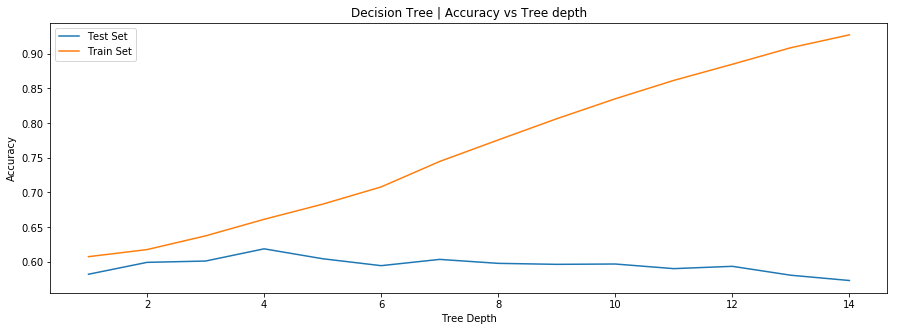

In [32]:


ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax1.plot(range(1,16),accuracy_test)
ax1.plot(range(1,16),accuracy_train)


plt.title("Decision Tree | Accuracy vs Tree depth")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")

plt.legend(['Test Set','Train Set'])

## Pruning Experimentation Result

## We should Prune the decision tree after depth = 7

## Decision Tree After Pruning


In [7]:
Decision_tree= DecisionTreeClassifier(max_depth=7, random_state=0)
Decision_tree.fit(X_train_scaled, y_train)
predictions = Decision_tree.predict(X_test_scaled)
print("Decision Tree After Pruning")
print("\n")
print("Acuracy on training set: {:.3f}".format(Decision_tree.score(X_train_scaled, y_train)*100))
print("Acuracy on test set: {:.3f}".format(Decision_tree.score(X_test_scaled, y_test)*100))
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test, predictions))

Decision Tree After Pruning


Acuracy on training set: 67.286
Acuracy on test set: 64.175

 Confusion Matrix: 

[[3327 2258]
 [2003 4306]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.62      0.60      0.61      5585
          1       0.66      0.68      0.67      6309

avg / total       0.64      0.64      0.64     11894



## Visualizing Decision Tree

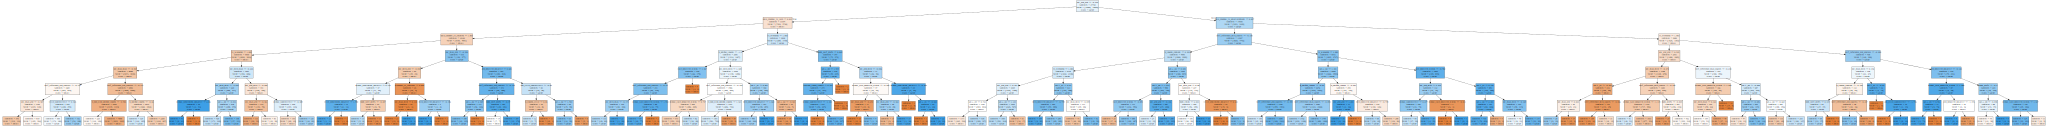

In [8]:
Decision_tree= DecisionTreeClassifier(max_depth=7, random_state=0)
Decision_tree.fit(X_train_scaled, y_train)

from sklearn.tree import export_graphviz
export_graphviz(Decision_tree, out_file="tree.dot",class_names=["Small", "Large"],
                feature_names=list(data.iloc[:,:cols-1].columns.values), impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


## Decision Tree with Adaboost without Pruning

In [9]:
Decision_tree= DecisionTreeClassifier( random_state=0)
Adaboost_Classifier = AdaBoostClassifier(base_estimator=Decision_tree)
Adaboost_Classifier.fit(X_train_scaled, y_train)
predictions = Adaboost_Classifier.predict(X_test_scaled)
print("Decision Tree with Adaboost ")
print("\n")
print("Acuracy on training set: {:.3f}".format(Adaboost_Classifier.score(X_train_scaled, y_train)*100))
print("Acuracy on test set: {:.3f}".format(Adaboost_Classifier.score(X_test_scaled, y_test)*100))
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test, predictions))

Decision Tree with Adaboost 


Acuracy on training set: 100.000
Acuracy on test set: 57.945

 Confusion Matrix: 

[[3095 2490]
 [2512 3797]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.55      0.55      0.55      5585
          1       0.60      0.60      0.60      6309

avg / total       0.58      0.58      0.58     11894



## Tree pruning Experimentation with Adaboost

## train set -> As depth of Decision Tree increases, Accuracy on train set increases

## And at tree size 8 or more , train set already reached accuracy of 100%

##  test set ->  At tree depth = 1  , test set achieves maximum accuracy of 64.8 %

In [28]:
accuracy_test=[None]*15
accuracy_train=[None]*15
count=0
for max_depth in range(1,15):
    Decision_tree= DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    Adaboost_Classifier = AdaBoostClassifier(base_estimator=Decision_tree)
    Adaboost_Classifier.fit(X_train_scaled, y_train)
    accuracy_train[count]=Adaboost_Classifier.score(X_train_scaled, y_train)
    accuracy_test[count]=Adaboost_Classifier.score(X_test_scaled, y_test)
    count+=1

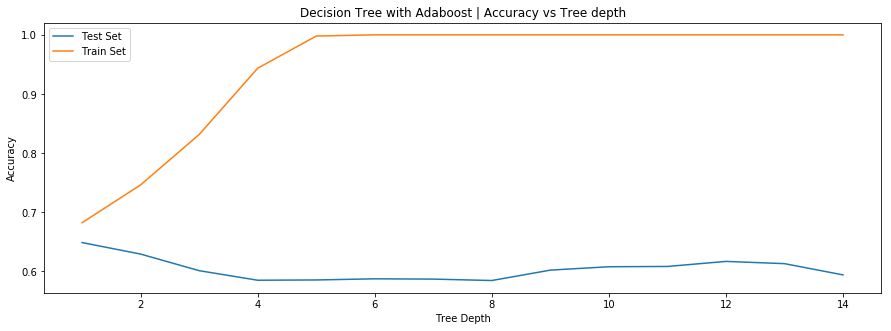

In [30]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax1.plot(range(1,16),accuracy_test)
ax1.plot(range(1,16),accuracy_train)


plt.title("Decision Tree with Adaboost | Accuracy vs Tree depth")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")

plt.legend(['Test Set','Train Set'])

In [13]:
accuracy_test=[None]*6997
accuracy_train=[None]*6997
count=0

for sample_size in np.arange(3,7000,1):
    df_temp = data.sample(n=sample_size)
    X_train, X_test, y_train, y_test = train_test_split(df_temp.iloc[:,:cols-1], df_temp.iloc[:,cols-1:cols], test_size=0.3, random_state=0)
    scalerX = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scalerX.transform(X_train)
    X_test_scaled = scalerX.transform(X_test)
    Decision_tree= DecisionTreeClassifier(max_depth=7, random_state=0)
    Decision_tree.fit(X_train_scaled, y_train)
    accuracy_train[count]=Decision_tree.score(X_train_scaled, y_train)
    accuracy_test[count]=Decision_tree.score(X_test_scaled, y_test)
    count+=1

errors = [1-x for x in accuracy_test]
errors_training =  [1-x for x in accuracy_train]

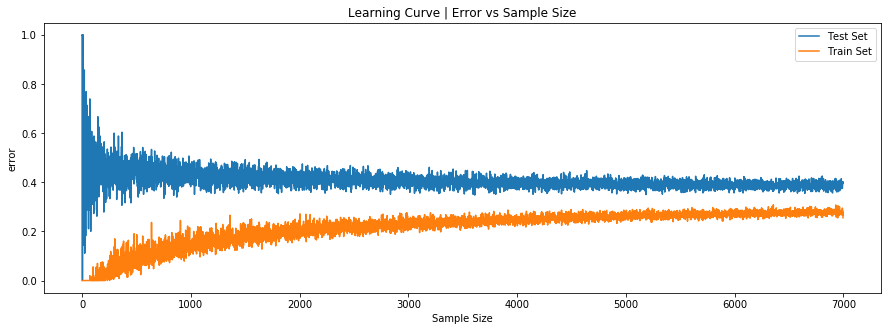

In [14]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax1.plot(errors)
ax1.plot(errors_training)

plt.title("Learning Curve | Error vs Sample Size")
plt.xlabel("Sample Size")
plt.ylabel("error")
plt.legend(['Test Set','Train Set'])

## Decision Tree with Adaboost without Pruning

In [27]:
Decision_tree= DecisionTreeClassifier(max_depth=1, random_state=0)
Adaboost_Classifier = AdaBoostClassifier(base_estimator=Decision_tree)
Adaboost_Classifier.fit(X_train_scaled, y_train)
predictions = Adaboost_Classifier.predict(X_test_scaled)
print("Decision Tree, depth = 2 with Adaboost ")
print("\n")
print("Acuracy on training set: {:.3f}".format(Adaboost_Classifier.score(X_train_scaled, y_train)*100))
print("Acuracy on test set: {:.3f}".format(Adaboost_Classifier.score(X_test_scaled, y_test)*100))
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test.values, predictions))

Decision Tree, depth = 2 with Adaboost 


Acuracy on training set: 68.177
Acuracy on test set: 64.810

 Confusion Matrix: 

[[542 437]
 [302 819]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.64      0.55      0.59       979
          1       0.65      0.73      0.69      1121

avg / total       0.65      0.65      0.65      2100

